# Thư viện

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

# Xử lý dữ liệu

Thêm dữ liệu

In [85]:

data = pd.read_csv('vietnam_housing_dataset.csv')
data.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [86]:
print(data.shape)
for col in data.columns:
    print(col, data[col].dtypes)

(30229, 12)
Address object
Area float64
Frontage float64
Access Road float64
House direction object
Balcony direction object
Floors float64
Bedrooms float64
Bathrooms float64
Legal status object
Furniture state object
Price float64


In [87]:
#Bảng thống kê dữ liệu
data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


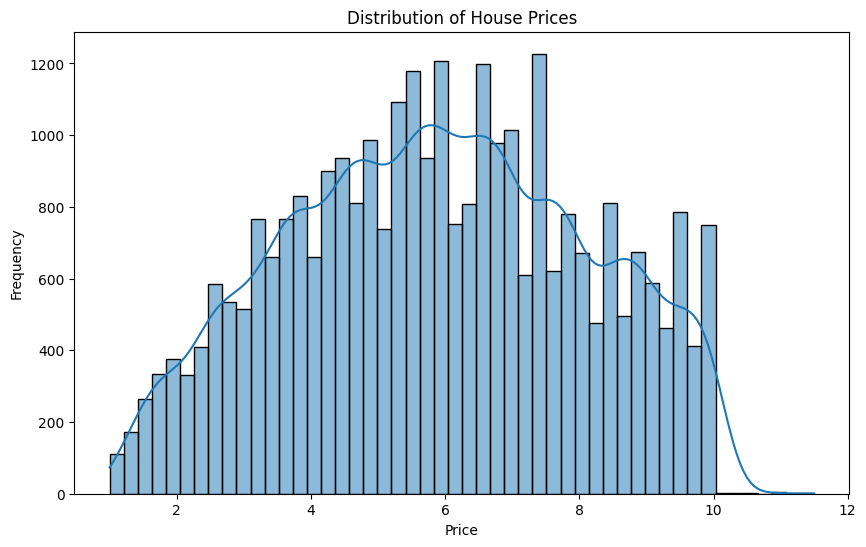

In [88]:
#Xem xét biến mục tiêu: Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Based on our sample size of only 29,999 apps, our margin of error is 1%
# (margin of error in percent = 100 / sqrt(N)) ==> 100 / sqrt(29999)
# And 0.6% of 29,999 apps is 180 apps.  So if less than 180 apps have a
# feature, it's less than our margin of error and statistically insignificant,
# so we'll drop those permission columns.
PERM_THRESHOLD = 0.01       

too_few_col_dropper = []   
too_many_col_dropper = []   
nonBlankRecordForCol = data.isna().sum()
# value_counts() returns a Pandas series, where the 0 key counts how many did not
# have the feature, and 1 counts how many that did.

# Note that if none had the feature, then the 1 key will not be present,
# and we get a key error.  We could check for the 0 case is 29999.

# p.s. Don't look at the last column, which is the class label
for col in data.columns[:-1]:
    if data[col].value_counts().get(1, 0) < PERM_THRESHOLD * nonBlankRecordForCol[col]:
        too_few_col_dropper.append(col)

print(f"There are {len(too_few_col_dropper)} permissions that less than {PERM_THRESHOLD} apps have, and will therefore be dropped.")

for col in data.columns[:-1]:
    if data[col].value_counts().get(1, 0) > (1 - PERM_THRESHOLD) * nonBlankRecordForCol[col]:
        too_many_col_dropper.append(col)

# Turns out none fit this bill, but that's OK - code is reusable
print(f"There are {len(too_many_col_dropper)} permissions that more than than {PERM_THRESHOLD} apps have, and will therefore be dropped.")

# Drop the columns
data = data.drop(data[too_few_col_dropper], axis=1)
data = data.drop(data[too_many_col_dropper], axis=1)
print(data.shape)

There are 2 permissions that less than 0.01 apps have, and will therefore be dropped.
There are 1 permissions that more than than 0.01 apps have, and will therefore be dropped.
(30229, 9)


Sự phân bố không quá lệch nên không cần sự chuyển đổi nào


In [90]:
print(data.head())


   Area House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0  84.0             NaN               NaN     4.0       NaN        NaN   
1  60.0             NaN               NaN     5.0       NaN        NaN   
2  90.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN   
3  54.0       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4  92.0      Đông - Nam        Đông - Nam     2.0       4.0        4.0   

       Legal status Furniture state  Price  
0  Have certificate             NaN   8.60  
1               NaN             NaN   7.50  
2     Sale contract             NaN   8.90  
3  Have certificate            Full   5.35  
4  Have certificate            Full   6.90  


Điền khuyết cho dữ liệu

In [91]:
#Điền khuyết cho dữ liệu số bằng median
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

In [92]:
# Điền khuyết cho dữ liệu chữ bằng mode
categorical_columns = data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    data[col].fillna('N/A', inplace=True)

In [93]:
print(data.head(10))

   Area House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0  84.0             N/A               N/A     4.0       3.0        3.0   
1  60.0             N/A               N/A     5.0       3.0        3.0   
2  90.0      Đông - Bắc        Đông - Bắc     5.0       3.0        3.0   
3  54.0       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4  92.0      Đông - Nam        Đông - Nam     2.0       4.0        4.0   
5  91.0       Tây - Bắc               N/A     3.0       3.0        3.0   
6  64.0             N/A               N/A     5.0       3.0        3.0   
7  74.0             Nam               Nam     5.0       4.0        5.0   
8  48.0             N/A               N/A     5.0       6.0        3.0   
9  91.0             N/A               N/A     5.0       3.0        3.0   

       Legal status Furniture state  Price  
0  Have certificate             N/A   8.60  
1               N/A             N/A   7.50  
2     Sale contract             N/A   8.90  
3  Ha

In [94]:
# Summary statistics
data.describe()


,Area,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,30229.000000,30229.000000,30229.000000,30229.000000
mean,68.498741,3.361507,3.423765,3.265672,5.872078
std,48.069835,1.254256,1.207520,1.234208,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,2.000000,3.000000,3.000000,4.200000
50%,56.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,10.000000,9.000000,9.000000,11.500000


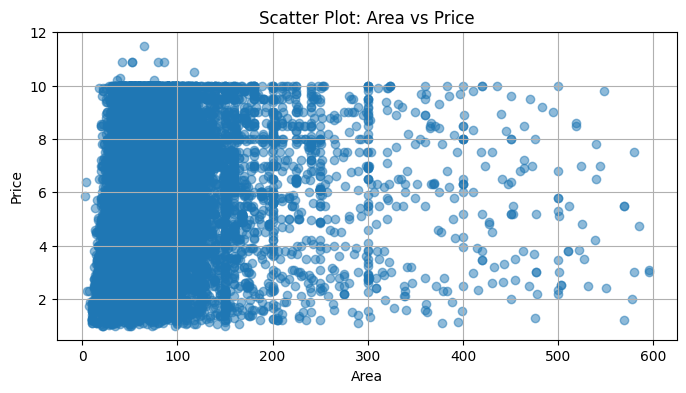

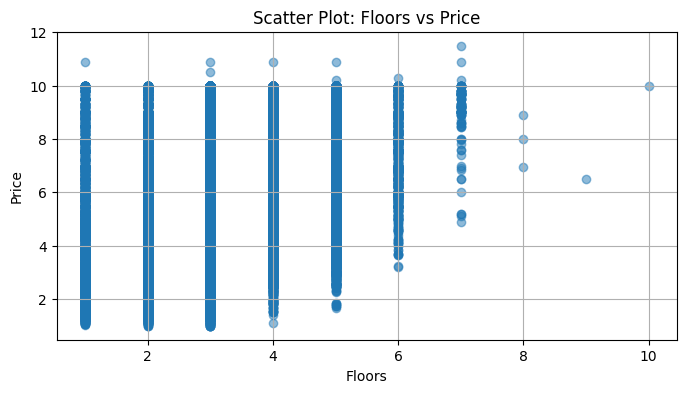

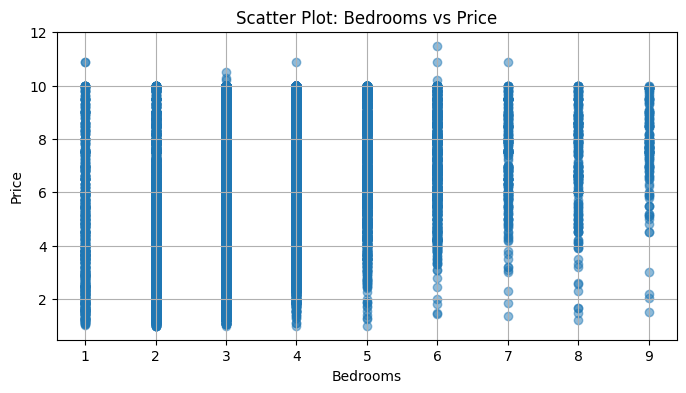

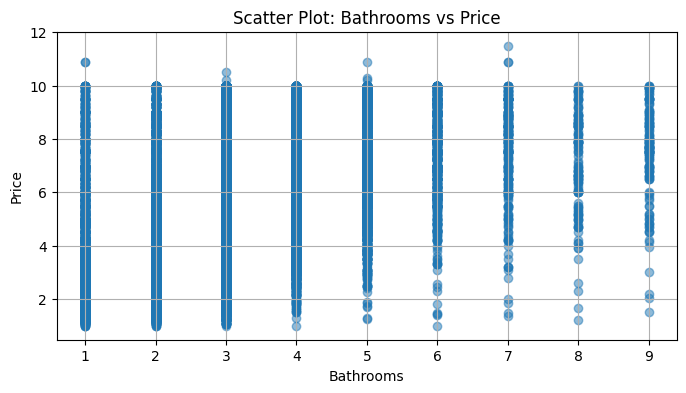

In [95]:
# Các đặc điểm vẽ biểu đồ theo 'Price'
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[feature], data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

Dựa trên các biểu đồ có thể thấy 1 số ngoại lai



In [96]:
# print(f"Before filtering: {data.shape}")

# numerical_cols = data.select_dtypes(include=[np.number]).columns
# def remove_outlier_IQR(df, series):
#     Q1=df[series].quantile(0.25)
#     Q3=df[series].quantile(0.75)
#     IQR=Q3-Q1
#     df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
#     return df_final

# for column in numerical_cols:
#     data = remove_outlier_IQR(data, column)

# data.reset_index(inplace = True)
# print(f"After filtering: {data.shape}")

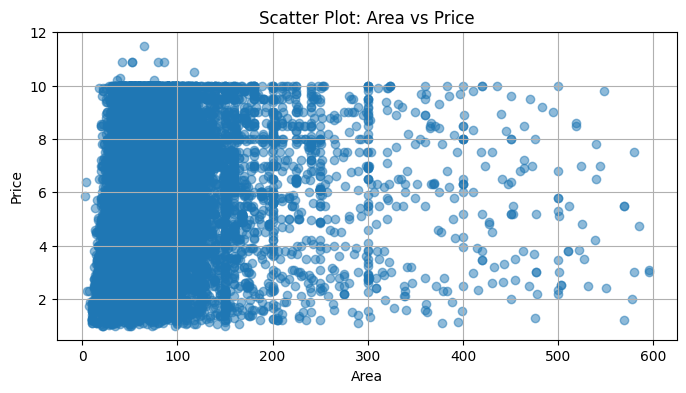

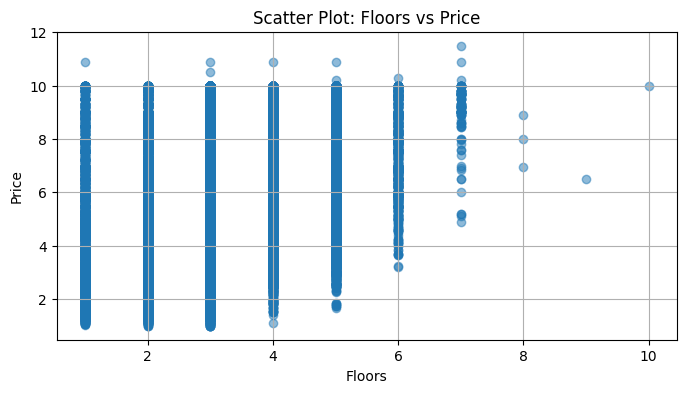

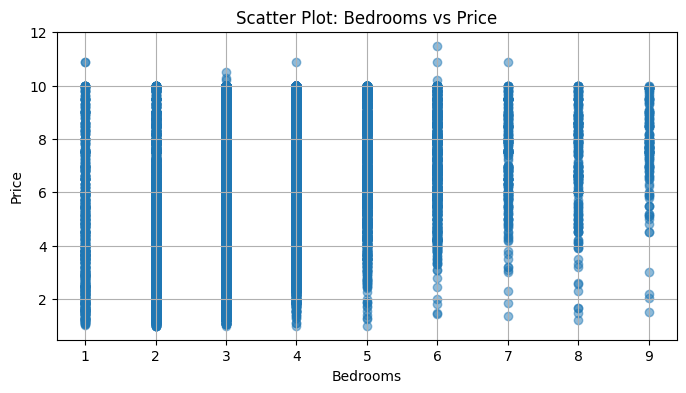

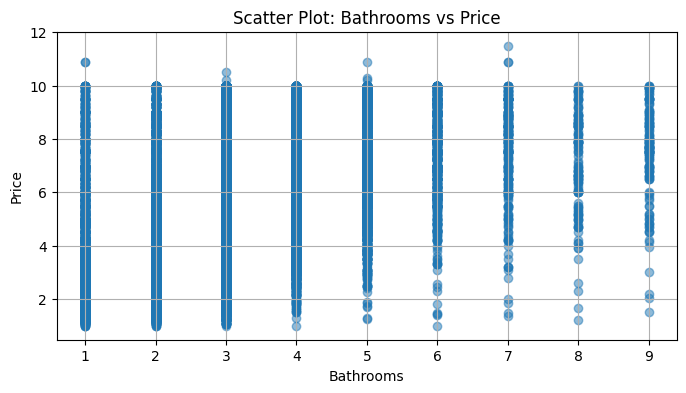

In [97]:
# Các đặc điểm vẽ biểu đồ theo 'Price'
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[feature], data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

Biểu đồ nhiệt

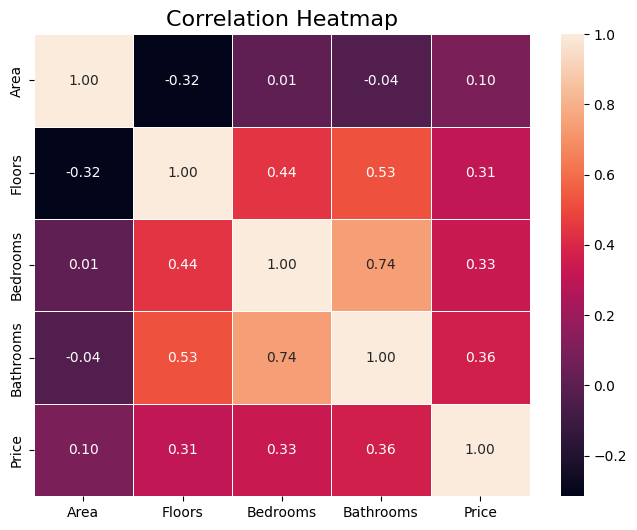

In [98]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Mô hình

Sử dụng mô hình hồi quy tuyến tính cho các cột dữ liệu kiểu số

In [99]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        e = LabelEncoder()
        data[col] = e.fit_transform(data[col])
        encoders[col] = e


In [100]:
print(encoders['House direction'].inverse_transform([0]))

['Bắc']


In [101]:
numerical_features = data.select_dtypes(include=['int64', 'float64', 'int32']).columns
x, y = data[numerical_features.drop('Price', errors='ignore')], data['Price']
x = x.drop('index', axis=1)
# print(y.shape)
xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2, random_state=42)
print(xTrain.shape)
print(yTrain.shape)

KeyError: "['index'] not found in axis"

In [63]:
print(x.head())

   Area  House direction  Balcony direction  Floors  Bedrooms  Bathrooms  \
0  84.0                1                  1     4.0       3.0        3.0   
1  60.0                1                  1     5.0       3.0        3.0   
2  90.0                7                  7     5.0       3.0        3.0   
3  54.0                5                  5     2.0       2.0        3.0   
4  92.0                8                  8     2.0       4.0        4.0   

   Legal status  Furniture state  
0             0                2  
1             1                2  
2             2                2  
3             0                1  
4             0                1  


In [57]:
from sklearn.linear_model import LinearRegression
lnPredictor = LinearRegression()
lnPredictor.fit(xTrain, yTrain)

LinearRegression()

Đánh giá mô hình qua tập validate

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(xTrain, xVal, yTrain, yVal, model):
    print(f"Bình phương sai số ở tập train là: {mean_absolute_error(yTrain, model.predict(xTrain))}")
    print(f"Bình phương sai số ở tập test là: {mean_absolute_error(yVal, model.predict(xVal))}")
    print(f"R2 của tập train là: {r2_score(yTrain, model.predict(xTrain))}")
    print(f"R2 của tập test là: {r2_score(yVal, model.predict(xVal))}")

In [ ]:
evaluate(xTrain, xVal, yTrain, yVal, lnPredictor)

Bình phương sai số ở tập train là: 1.5363499213911256
Bình phương sai số ở tập test là: 1.5482289412666894
R2 của tập train là: 0.20403858481344184
R2 của tập test là: 0.1879911595084024


In [60]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
baseModel = DecisionTreeRegressor(max_depth=10)
adaModel = AdaBoostRegressor(estimator=baseModel, n_estimators=50, learning_rate=0.01, random_state=9999)
adaModel.fit(xTrain, yTrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, random_state=9999)

In [61]:
evaluate(xTrain, xVal, yTrain, yVal, adaModel)

Bình phương sai số ở tập train là: 1.3439777104174255
Bình phương sai số ở tập test là: 1.4505498329152176
R2 của tập train là: 0.3585971385770471
R2 của tập test là: 0.262414121629323


In [104]:
import pickle
encoders['Balcony direction'].transform('N/A')
print(lnPredictor.coef_)
with open("lnPredictor.pkl", "wb") as file:
    pickle.dump(lnPredictor, file, protocol=5)
with open("LabelEncoder.pkl", "wb") as file:
    pickle.dump(encoders, file, protocol=5)
with open("predictCol.pkl", "wb") as file:
    pickle.dump(x.columns, file, protocol=5)

ValueError: y should be a 1d array, got an array of shape () instead.